# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
movie = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movie.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [4]:
movie.rename(columns = {'id':'movie_id'}, inplace = True)

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   movie_id              4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [7]:
movie.shape

(4803, 20)

In [8]:
movie.isnull().sum()

budget                     0
genres                     0
homepage                3091
movie_id                   0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [9]:
movie.duplicated().sum()

0

In [10]:
credits.duplicated().sum()

0

In [11]:
movies = movie.merge(credits, on = 'movie_id')

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   movie_id              4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [13]:
movies.head(3)

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


<Axes: ylabel='Density'>

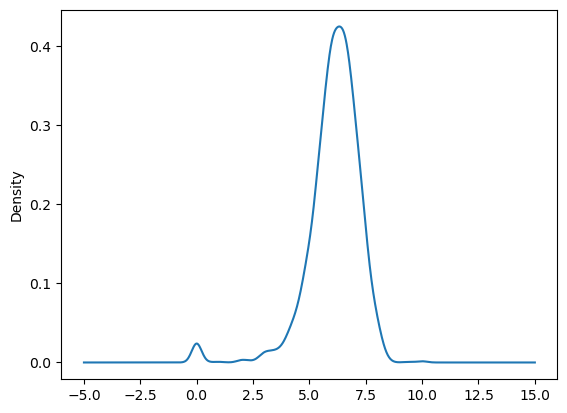

In [14]:
movies['vote_average'].plot(kind = 'kde')

<Axes: ylabel='Density'>

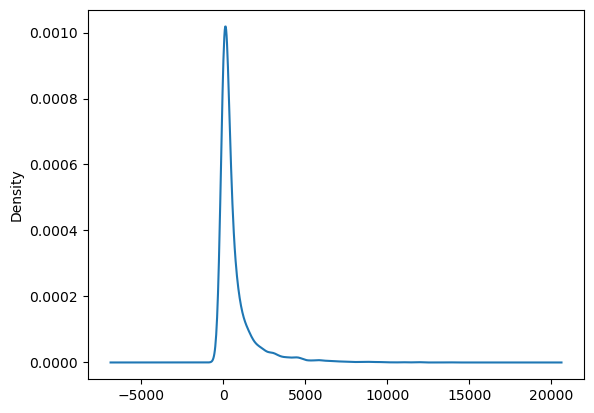

In [15]:
movies['vote_count'].plot(kind = 'kde')

<Axes: ylabel='Density'>

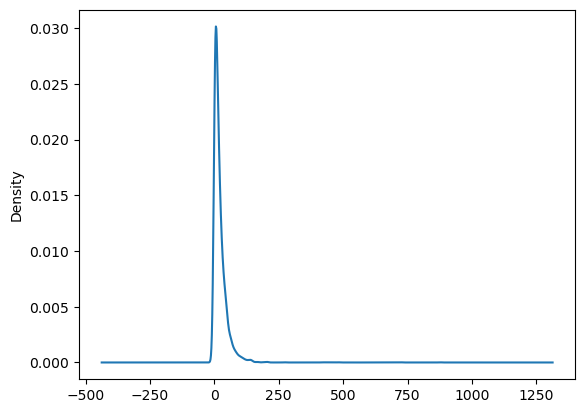

In [16]:
movies['popularity'].plot(kind = 'kde')

# Content Based Recommendations

In [83]:
# important columns for tag creation
# genres, movie_id, overview, keywords, cast, crew, title
movies = movies[['movie_id', 'title_x', 'genres', 'overview', 'keywords', 'cast', 'crew']]

In [84]:
movies

,movie_id,title_x,genres,overview,keywords,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",A cryptic message from Bond’s past sends him o...,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Following the death of District Attorney Harve...,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","John Carter is a war-weary, former military ca...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",El Mariachi just wants to play his guitar and ...,"[{""id"": 5616, ""name"": ""united states\u2013mexi...","[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",A newlywed couple's honeymoon is upended by th...,[],"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,[],When ambitious New York attorney Sam is sent t...,[],"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [85]:
movies.duplicated().sum()

0

In [86]:
movies.dropna(inplace = True)

In [87]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4800 non-null   int64 
 1   title_x   4800 non-null   object
 2   genres    4800 non-null   object
 3   overview  4800 non-null   object
 4   keywords  4800 non-null   object
 5   cast      4800 non-null   object
 6   crew      4800 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.0+ KB


In [88]:
movies.reset_index(inplace = True)

In [89]:
movies.drop(columns = ['index'], inplace = True)

In [90]:
movies.rename(columns = {'title_x':'title'}, inplace = True)

In [91]:
movies.head(2)

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [92]:
import ast

In [93]:
def convert(text):
    l = []
    for i in ast.literal_eval(text):
        l.append(i['name'])
    return l

In [94]:
movies['genres'] = movies['genres'].apply(convert)

In [95]:
movies

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4795,9367,El Mariachi,"[Action, Crime, Thriller]",El Mariachi just wants to play his guitar and ...,"[{""id"": 5616, ""name"": ""united states\u2013mexi...","[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4796,72766,Newlyweds,"[Comedy, Romance]",A newlywed couple's honeymoon is upended by th...,[],"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4797,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TV Movie]","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4798,126186,Shanghai Calling,[],When ambitious New York attorney Sam is sent t...,[],"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [96]:
movies['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [97]:
movies['keywords'] = movies['keywords'].apply(convert)

In [98]:
movies

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4795,9367,El Mariachi,"[Action, Crime, Thriller]",El Mariachi just wants to play his guitar and ...,"[united states–mexico barrier, legs, arms, pap...","[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4796,72766,Newlyweds,"[Comedy, Romance]",A newlywed couple's honeymoon is upended by th...,[],"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4797,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TV Movie]","""Signed, Sealed, Delivered"" introduces a dedic...","[date, love at first sight, narration, investi...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4798,126186,Shanghai Calling,[],When ambitious New York attorney Sam is sent t...,[],"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [99]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [100]:
def convert2(text):
    d = []
    for i in ast.literal_eval(text):
        d.append(i['name'])
    return d[0:3]

In [101]:
movies['cast'] = movies['cast'].apply(convert2)

In [102]:
movies

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4795,9367,El Mariachi,"[Action, Crime, Thriller]",El Mariachi just wants to play his guitar and ...,"[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4796,72766,Newlyweds,"[Comedy, Romance]",A newlywed couple's honeymoon is upended by th...,[],"[Edward Burns, Kerry Bishé, Marsha Dietlein]","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4797,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TV Movie]","""Signed, Sealed, Delivered"" introduces a dedic...","[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe]","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4798,126186,Shanghai Calling,[],When ambitious New York attorney Sam is sent t...,[],"[Daniel Henney, Eliza Coupe, Bill Paxton]","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [103]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [104]:
def convert3(text):
    p = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            p.append(i['name'])
    return p

In [105]:
movies['crew'] = movies['crew'].apply(convert3)

In [106]:
movies

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]
...,...,...,...,...,...,...,...
4795,9367,El Mariachi,"[Action, Crime, Thriller]",El Mariachi just wants to play his guitar and ...,"[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4796,72766,Newlyweds,"[Comedy, Romance]",A newlywed couple's honeymoon is upended by th...,[],"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns]
4797,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TV Movie]","""Signed, Sealed, Delivered"" introduces a dedic...","[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith]
4798,126186,Shanghai Calling,[],When ambitious New York attorney Sam is sent t...,[],"[Daniel Henney, Eliza Coupe, Bill Paxton]",[Daniel Hsia]


In [107]:
def remove_spaces(list):
    l = []
    for i in list:
        l.append(i.replace(' ', ''))
    return l

In [108]:
movies['genres'] = movies['genres'].apply(remove_spaces)
movies['keywords'] = movies['keywords'].apply(remove_spaces)
movies['cast'] = movies['cast'].apply(remove_spaces)
movies['crew'] = movies['crew'].apply(remove_spaces)

In [109]:
movies

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","In the 22nd century, a paraplegic Marine is di...","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","John Carter is a war-weary, former military ca...","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]
...,...,...,...,...,...,...,...
4795,9367,El Mariachi,"[Action, Crime, Thriller]",El Mariachi just wants to play his guitar and ...,"[unitedstates–mexicobarrier, legs, arms, paper...","[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez]
4796,72766,Newlyweds,"[Comedy, Romance]",A newlywed couple's honeymoon is upended by th...,[],"[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns]
4797,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TVMovie]","""Signed, Sealed, Delivered"" introduces a dedic...","[date, loveatfirstsight, narration, investigat...","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith]
4798,126186,Shanghai Calling,[],When ambitious New York attorney Sam is sent t...,[],"[DanielHenney, ElizaCoupe, BillPaxton]",[DanielHsia]


In [ ]:
for i in range(movies.shape[0]):
    movies['overview'][i] = movies['overview'][i].split()

In [111]:
movies

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[A, cryptic, message, from, Bond’s, past, send...","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Following, the, death, of, District, Attorney...","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[John, Carter, is, a, war-weary,, former, mili...","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]
...,...,...,...,...,...,...,...
4795,9367,El Mariachi,"[Action, Crime, Thriller]","[El, Mariachi, just, wants, to, play, his, gui...","[unitedstates–mexicobarrier, legs, arms, paper...","[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez]
4796,72766,Newlyweds,"[Comedy, Romance]","[A, newlywed, couple's, honeymoon, is, upended...",[],"[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns]
4797,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TVMovie]","[""Signed,, Sealed,, Delivered"", introduces, a,...","[date, loveatfirstsight, narration, investigat...","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith]
4798,126186,Shanghai Calling,[],"[When, ambitious, New, York, attorney, Sam, is...",[],"[DanielHenney, ElizaCoupe, BillPaxton]",[DanielHsia]


In [112]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [113]:
movies

,movie_id,title,genres,overview,keywords,cast,crew,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[Action, Adventure, Crime]","[A, cryptic, message, from, Bond’s, past, send...","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Following, the, death, of, District, Attorney...","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[John, Carter, is, a, war-weary,, former, mili...","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...,...,...,...,...,...
4795,9367,El Mariachi,"[Action, Crime, Thriller]","[El, Mariachi, just, wants, to, play, his, gui...","[unitedstates–mexicobarrier, legs, arms, paper...","[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez],"[El, Mariachi, just, wants, to, play, his, gui..."
4796,72766,Newlyweds,"[Comedy, Romance]","[A, newlywed, couple's, honeymoon, is, upended...",[],"[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns],"[A, newlywed, couple's, honeymoon, is, upended..."
4797,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TVMovie]","[""Signed,, Sealed,, Delivered"", introduces, a,...","[date, loveatfirstsight, narration, investigat...","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith],"[""Signed,, Sealed,, Delivered"", introduces, a,..."
4798,126186,Shanghai Calling,[],"[When, ambitious, New, York, attorney, Sam, is...",[],"[DanielHenney, ElizaCoupe, BillPaxton]",[DanielHsia],"[When, ambitious, New, York, attorney, Sam, is..."


In [114]:
movies['tags'] = movies['tags'].apply(lambda x: [i.lower() for i in x])

In [115]:
movies

,movie_id,title,genres,overview,keywords,cast,crew,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[in, the, 22nd, century,, a, paraplegic, marin..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[captain, barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[Action, Adventure, Crime]","[A, cryptic, message, from, Bond’s, past, send...","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[a, cryptic, message, from, bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Following, the, death, of, District, Attorney...","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[following, the, death, of, district, attorney..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[John, Carter, is, a, war-weary,, former, mili...","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[john, carter, is, a, war-weary,, former, mili..."
...,...,...,...,...,...,...,...,...
4795,9367,El Mariachi,"[Action, Crime, Thriller]","[El, Mariachi, just, wants, to, play, his, gui...","[unitedstates–mexicobarrier, legs, arms, paper...","[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez],"[el, mariachi, just, wants, to, play, his, gui..."
4796,72766,Newlyweds,"[Comedy, Romance]","[A, newlywed, couple's, honeymoon, is, upended...",[],"[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns],"[a, newlywed, couple's, honeymoon, is, upended..."
4797,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TVMovie]","[""Signed,, Sealed,, Delivered"", introduces, a,...","[date, loveatfirstsight, narration, investigat...","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith],"[""signed,, sealed,, delivered"", introduces, a,..."
4798,126186,Shanghai Calling,[],"[When, ambitious, New, York, attorney, Sam, is...",[],"[DanielHenney, ElizaCoupe, BillPaxton]",[DanielHsia],"[when, ambitious, new, york, attorney, sam, is..."


In [116]:
len(movies['tags'][0])

57

In [117]:
movies['tags'] = movies['tags'].apply(lambda x: ' '.join(x))

In [118]:
movies

,movie_id,title,genres,overview,keywords,cast,crew,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[Action, Adventure, Crime]","[A, cryptic, message, from, Bond’s, past, send...","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Following, the, death, of, District, Attorney...","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],following the death of district attorney harve...
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[John, Carter, is, a, war-weary,, former, mili...","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"john carter is a war-weary, former military ca..."
...,...,...,...,...,...,...,...,...
4795,9367,El Mariachi,"[Action, Crime, Thriller]","[El, Mariachi, just, wants, to, play, his, gui...","[unitedstates–mexicobarrier, legs, arms, paper...","[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez],el mariachi just wants to play his guitar and ...
4796,72766,Newlyweds,"[Comedy, Romance]","[A, newlywed, couple's, honeymoon, is, upended...",[],"[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns],a newlywed couple's honeymoon is upended by th...
4797,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TVMovie]","[""Signed,, Sealed,, Delivered"", introduces, a,...","[date, loveatfirstsight, narration, investigat...","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith],"""signed, sealed, delivered"" introduces a dedic..."
4798,126186,Shanghai Calling,[],"[When, ambitious, New, York, attorney, Sam, is...",[],"[DanielHenney, ElizaCoupe, BillPaxton]",[DanielHsia],when ambitious new york attorney sam is sent t...


In [119]:
new_df = movies.drop(columns = ['genres', 'overview', 'keywords', 'cast', 'crew'])

In [151]:
new_df

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."
...,...,...,...
4795,9367,El Mariachi,el mariachi just wants to play his guitar and ...
4796,72766,Newlyweds,a newlywed couple's honeymoon is upended by th...
4797,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduces a dedic..."
4798,126186,Shanghai Calling,when ambitious new york attorney sam is sent t...


In [121]:
new_df['tags'][1]

"captain barbossa, long believed to be dead, has come back to life and is headed to the edge of the earth with will turner and elizabeth swann. but nothing is quite as it seems. adventure fantasy action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger johnnydepp orlandobloom keiraknightley goreverbinski"

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 6000, stop_words = 'english')

In [123]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [124]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [125]:
vectors.shape

(4800, 6000)

In [126]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

In [127]:
similarity

array([[1.        , 0.0860309 , 0.05647825, ..., 0.02366243, 0.02533473,
        0.        ],
       [0.0860309 , 1.        , 0.06154575, ..., 0.02578553, 0.        ,
        0.        ],
       [0.05647825, 0.06154575, 1.        , ..., 0.02539184, 0.        ,
        0.        ],
       ...,
       [0.02366243, 0.02578553, 0.02539184, ..., 1.        , 0.06834085,
        0.04671418],
       [0.02533473, 0.        , 0.        , ..., 0.06834085, 1.        ,
        0.05001563],
       [0.        , 0.        , 0.        , ..., 0.04671418, 0.05001563,
        1.        ]])

In [128]:
similarity.shape

(4800, 4800)

In [129]:
similarity[0]

array([1.        , 0.0860309 , 0.05647825, ..., 0.02366243, 0.02533473,
       0.        ])

In [130]:
new_df.index[new_df['title'] == 'Spectre'][0]

2

In [131]:
for i in range(5):
    a = (sorted(list(enumerate(similarity[0])), key = lambda x: x[1], reverse = True)[1:6][i][0])
    print(a)

539
1191
507
260
1213


In [132]:
def recommend(movie_name):
    index_position = new_df.index[new_df['title'] == movie_name][0]
    for i in range(5):
        a = (sorted(list(enumerate(similarity[index_position])), key = lambda x: x[1], reverse = True)[1:6][i][0])
        print(new_df.iloc[a]['title'])

In [172]:
recommend('The Amazing Spider-Man')

The Amazing Spider-Man 2
Spider-Man 3
Spider-Man
Hook
I Love You, Man


In [175]:
recommend('The Avengers')

Avengers: Age of Ultron
Captain America: Civil War
Iron Man 3
Captain America: The First Avenger
Ant-Man


In [152]:
final_df = new_df.to_dict()

In [ ]:
final_df

# Popularity Based Recommendation

In [154]:
movie

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://harrypotter.warnerbros.com/harrypottera...,767,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,153.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,400000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",http://www.sonypictures.com/cthe/montypython/,762,"[{""id"": 113, ""name"": ""holy grail""}, {""id"": 345...",en,Monty Python and the Holy Grail,"King Arthur, accompanied by his squire, recrui...",64.782984,"[{""name"": ""Python (Monty) Pictures Limited"", ""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",1975-03-13,5028948,91.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,And now! At Last! Another film completely diff...,Monty Python and the Holy Grail,7.8,1708
4595,350000,"[{""id"": 27, ""name"": ""Horror""}]",NaN,764,"[{""id"": 769, ""name"": ""falsely accused""}, {""id""...",en,The Evil Dead,When a group of college students finds a myste...,35.037625,"[{""name"": ""Renaissance Pictures"", ""id"": 467}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1981-10-15,29400000,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Ultimate Experience In Grueling Terror,The Evil Dead,7.3,894
4602,350000,"[

In [155]:
movie['vote_average'].describe()

count    487.000000
mean       7.454209
std        0.349452
min        7.000000
25%        7.200000
50%        7.400000
75%        7.700000
max        8.500000
Name: vote_average, dtype: float64

In [156]:
movie['vote_count'].describe()

count      487.000000
mean      2752.030801
std       2205.677207
min        701.000000
25%       1101.000000
50%       1949.000000
75%       3776.000000
max      13752.000000
Name: vote_count, dtype: float64

In [157]:
movie = movie[(movie['vote_average'] >= 7) & (movie['vote_count'] >= 700)]

In [158]:
popular_movies = movie.sort_values('popularity', ascending = False)
popular_movies['genres'] = popular_movies['genres'].apply(convert)

In [159]:
popular_movies = popular_movies[['movie_id', 'title', 'genres', 'popularity', 'vote_average', 'vote_count', 'overview']]

In [160]:
popular_movies

,movie_id,title,genres,popularity,vote_average,vote_count,overview
95,157336,Interstellar,"[Adventure, Drama, Science Fiction]",724.247784,8.1,10867,Interstellar chronicles the adventures of a gr...
788,293660,Deadpool,"[Action, Adventure, Comedy]",514.569956,7.4,10995,Deadpool tells the origin story of former Spec...
94,118340,Guardians of the Galaxy,"[Action, Science Fiction, Adventure]",481.098624,7.9,9742,"Light years from Earth, 26 years after being a..."
127,76341,Mad Max: Fury Road,"[Action, Adventure, Science Fiction, Thriller]",434.278564,7.2,9427,An apocalyptic story set in the furthest reach...
199,22,Pirates of the Caribbean: The Curse of the Bla...,"[Adventure, Fantasy, Action]",271.972889,7.5,6985,"Jack Sparrow, a freewheeling 17th-century pira..."
...,...,...,...,...,...,...,...
3701,641,Requiem for a Dream,"[Crime, Drama]",11.573034,7.9,2443,The hopes and dreams of four ambitious people ...
1974,3558,"Girl, Interrupted",[Drama],10.713521,7.6,721,"Set in the changing world of the late 1960's, ..."
204,51497,Fast Five,"[Action, Thriller, Crime]",7.255718,7.1,2438,Former cop Brian O'Conner partners with ex-con...
101,49538,X-Men: First Class,"[Action, Science Fiction, Adventure]",3.195174,7.1,5181,Before Charles Xavier and Erik Lensherr took t...


In [170]:
x = []
for i in popular_movies['genres']:
    for j in i:
        x.append(j)
diff_genre = set(x)

In [171]:
diff_genre

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western'}

In [161]:
l = []
for i in range(popular_movies.shape[0]):
    if ('Action' in popular_movies.iloc[i]['genres']) and ('Drama' in popular_movies.iloc[i]['genres']):
        l.append(popular_movies.iloc[i])
users_df = pd.DataFrame(l)
p = users_df.sort_values('popularity', ascending = False).iloc[0:10]['title'].values
for i in p:
    print(i)

Dawn of the Planet of the Apes
The Dark Knight
Fury
Rise of the Planet of the Apes
Batman Begins
The Dark Knight Rises
Gladiator
The Bourne Identity
Inglourious Basterds
Scarface


In [162]:
l = []
def popular_recommendations(genre1, genre2):
    for i in range(popular_movies.shape[0]):
        if (genre1 in popular_movies.iloc[i]['genres']) and (genre2 in popular_movies.iloc[i]['genres']):
            l.append(popular_movies.iloc[i])
    users_df = pd.DataFrame(l)
    p = users_df.sort_values('popularity', ascending = False).iloc[0:10]['title'].values
    for i in p:
        print(i)

In [163]:
popular_recommendations('Science Fiction', 'Romance')

Gattaca
Eternal Sunshine of the Spotless Mind
Her


In [164]:
popular_movies[popular_movies['title'] == 'Gattaca']

,movie_id,title,genres,popularity,vote_average,vote_count,overview
1352,782,Gattaca,"[Thriller, Science Fiction, Mystery, Romance]",70.398356,7.5,1808,Science fiction drama about a future society i...


In [165]:
import pickle
pickle.dump(final_df, open('movie_details.pkl', 'wb'))

In [166]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [167]:
pickle.dump(popular_movies, open('popular_movies.pkl', 'wb'))